<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK13_1_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 평균 이동

## 평균 이동(Mean Shift)의 개요

- 평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행
- 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음
- 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)를 이용
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation) 이용
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식
- 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄

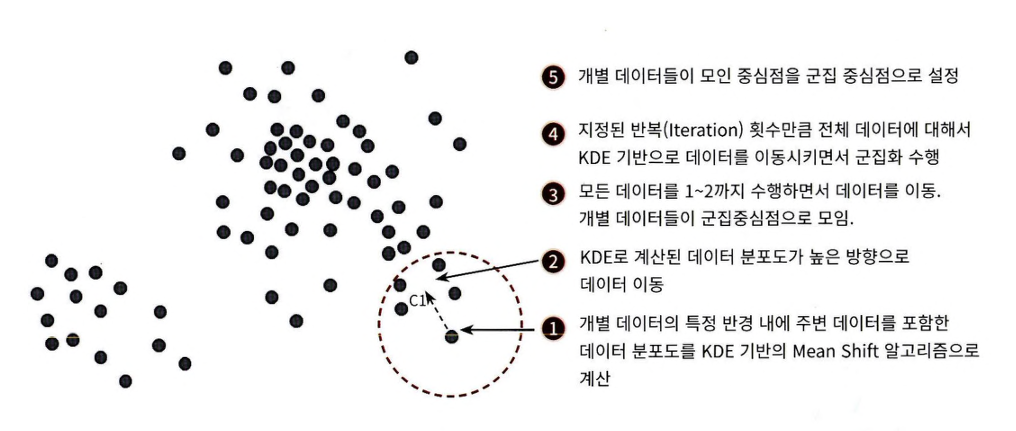

- KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
- 확률 밀도 함수 PDF(Probability Density Function)는 확률 변수의 분포를 나타내는 함수
> 정규분포, 감마 분포, t-분포
- KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정
> 가우시안 분포 함수 사용
- 그림의 왼쪽은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것 / 오른쪽은 적용 값을 모두
더한 KDE 결과

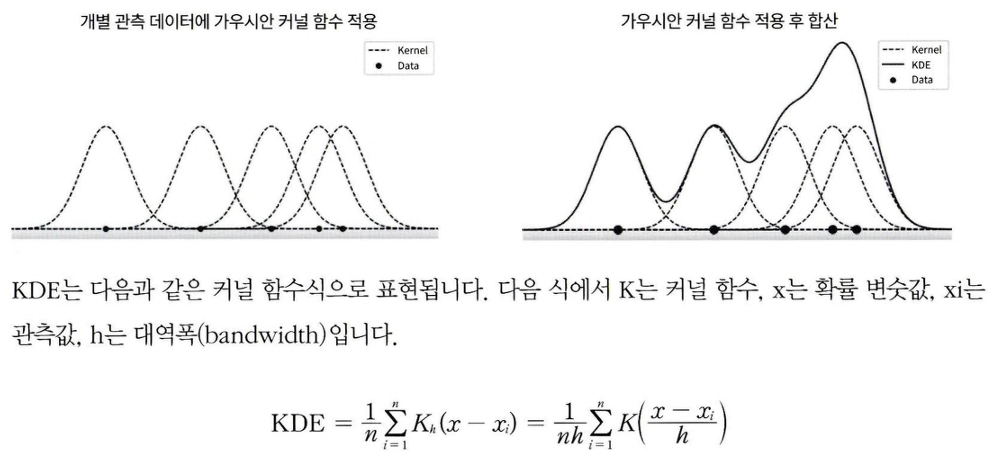

- 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용
- 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있음

< 그림 >
- h 값을 증가시키면서 변화되는 KDE를 나타냄
- 작은 h 값(h=1.0)은 좁고 뾰족한 KDE
> 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합되기 쉬움
- 매우 큰 h 값(h=10)은 과도하게 평활화(smoothing)된 KDE
> 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하기에 과소적합되기 쉬움

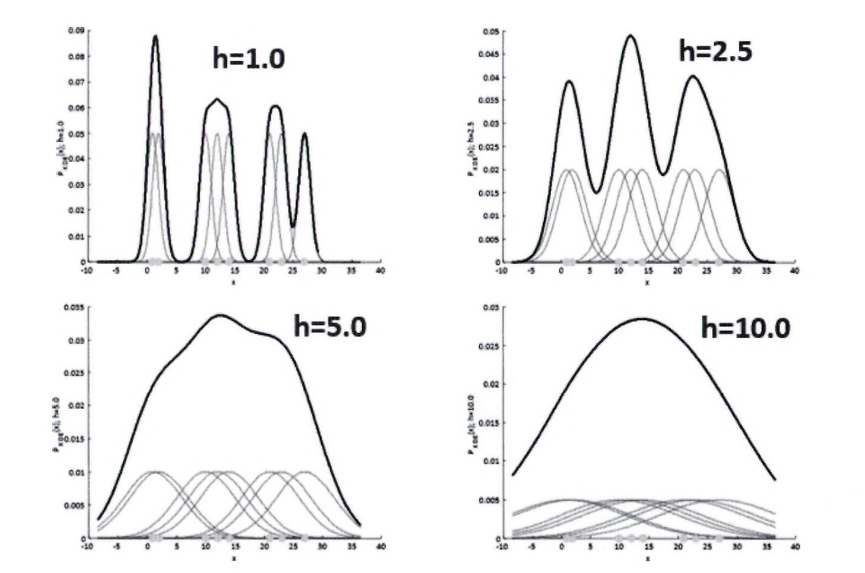

- 대역폭이 클수록 평활화된 KDE로 인한 적은 수의 군집 중심점
- 대역폭이 적을수록 많은 수의 군집 중심점
- 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화 수행
- 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공
> 가장 중요한 초기화 파라미터 = **bandwidth = KDE의 대역폭 h**
- 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기에 사이킷런은 **최적의 대역폭 계산**을 위해 estimate_bandwidth() 함수를 제공

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [ ]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


/tmp/ipython-input-1550767529.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker=''%label)


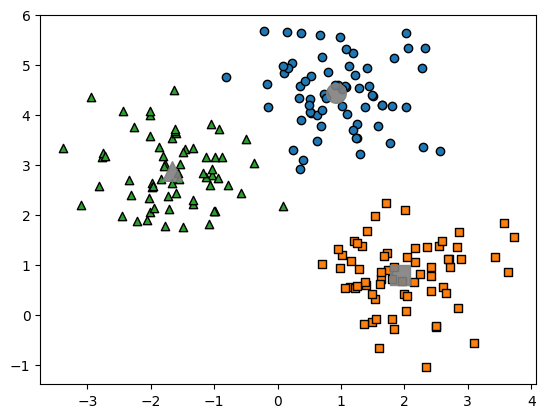

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집 별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집 별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
              marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker=''%label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


# 4. GMM(Gaussian Mixture Model)

## GMM(Gaussian Mixture Model) 소개

- GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- 정규 분포 = 가우시안 분포 = 좌우 대칭형의 종(Bell) 형태의 연속 확률 함수
- GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주
- 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출

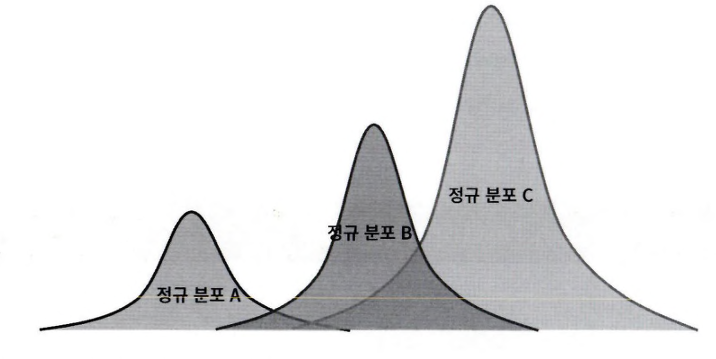

위의 세 정규분포를 합친 아래의 그림

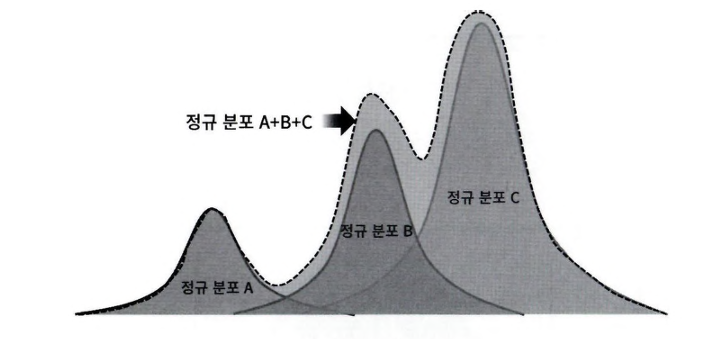

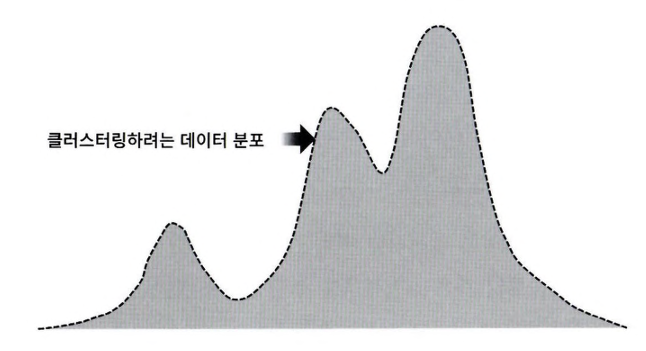

- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 확률 분포 곡선으로 구성될 수 있기에 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM
- 즉, 데이터 세트를 구성하는 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정
> 모수 추정
    1. 개별 정규 분포의 평균과 분산 추정
    2. 각 데이터가 어떤 정규 분포에 해당되는지의 확률 추정

- for this, GMM은 EM(Expectation and Maximization) 방법 적용
> EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스 지원

## GMM을 이용한 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- GaussianMixture 객체의 가장 중요 초기화 파라미터 = n_components
> gaussian mixture의 모델 총 개수 : K-평균의 n_clusters처럼 군집 개수 정하는 데 중요한 역할 수행

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


## GMM과 K-평균 비교

- KMeans는 원형의 범위에서 군집화 수행
- 데이터 세트가 원형의 범위를 가질수록 KMeans의
군집화 효율은 더욱 높아짐
- 아래는 make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용한 결과
- 이렇게 cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있음

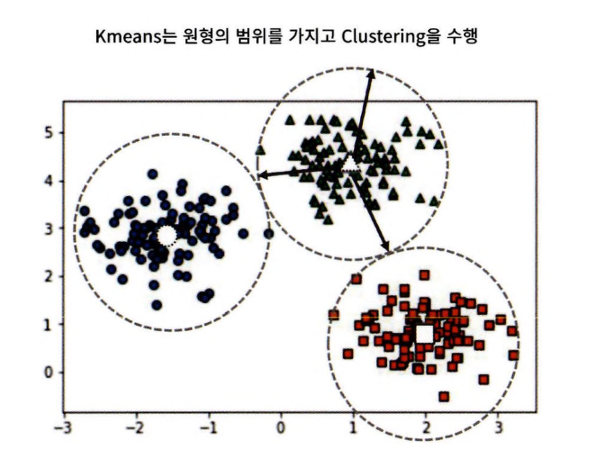

- 하지만 데이터가 원형의 범위로 퍼져 있지 않은 경우에는 Kmeans는 군집화를 잘 수행하지 못함
- 즉, 길쭉한 타원형일 때 군집화 수행 불가

In [ ]:
def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])
    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=markers[label % len(markers)])

        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            # Assuming cluster_result has a .cluster_centers_ attribute
            center_x_y = cluster_result.cluster_centers_[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                        marker=markers[label % len(markers)])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                        marker='' % label)
    plt.show()

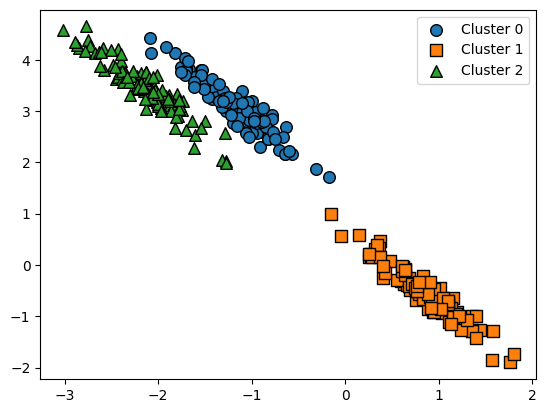

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

< Kmeans >

/tmp/ipython-input-3623408909.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',


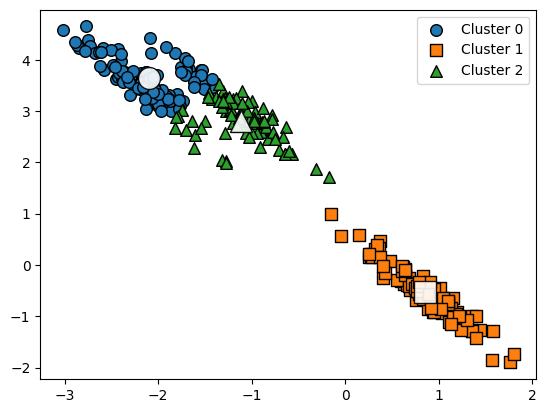

In [ ]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

< GMM >

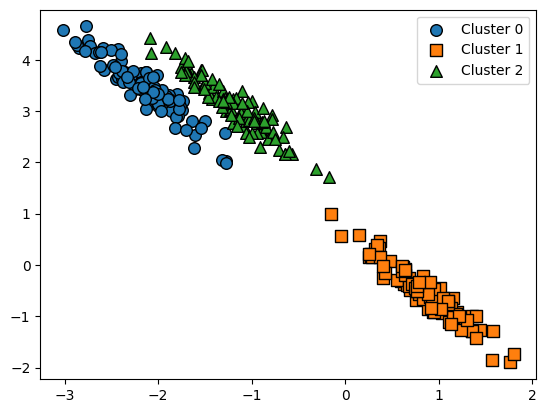

In [ ]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

make_blobs()의 target 값 vs. KMeans, GMM의 군집 Label 값
> 위와 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


- KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우가 발생
- 하지만 GMM의 경우는 군집이 target 값과 잘 매핑
> 이처럼 GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만 군집화를 위한 수행 시간이 오래 걸림